# Assignment #1


## Greedy Motif Search

In [1]:
from Bio import SeqIO
import numpy as np
import math

In [65]:
def totalcount(x, pseudocount):
    x=list(x)
    counts = np.array([
        x.count('A'),
        x.count('T'),
        x.count('G'),
        x.count('C')
        ])
    finalcount = (counts + pseudocount)/(len(x) + 4*pseudocount)
    return finalcount


def profile(DNA, k, pos, log_odd=True):
    N = len(DNA)# or pos0
    x = np.empty((N, k), dtype=str) #matrix with k-mers
    W = np.empty((4, k)) #position weight matrix
    for i in range(N):
        x[i, :] = list(DNA[i][pos[i]:pos[i]+k])
    for j in range(k):
        W[:,j] = totalcount(x[:,j], pseudocount=1)
    if log_odd==True: # log-odds matrix
        W2 = np.log(W*4)/np.log(4)
    else: 
        W2 = W
    return W2

def llr(profile, s):
    ref = {
        'A':0,
        'T':1,
        'G':2,
        'C':3
    }
    llratio = 0
    for i in range(len(s)):
        llratio += profile[ref[s[i]], i]
    return llratio

def motifpos(profile, DNA): #Finds the motif with highest llr for a given profile(pwm)
    N = len(DNA)
    k = profile.shape[1]
    pos = np.empty(N, dtype=int)
    for i in range(N):
        maxllr = -math.inf
        for j in range(len(DNA[i])-k+1):
            llrval = llr(profile, DNA[i][j:j+k])
            if llrval > maxllr:
                maxllr = llrval
                pos[i] = j
    return pos  

def GreedySearch(DNA, k):
    N = len(DNA)
    pos = np.array([np.random.randint(0, len(DNA[i]) - k) for i in range(N)])
    ind=0
    while True:
        ind = ind +1
        old_pos = pos.copy()
        pwm = profile(DNA, k, pos)
        pos = motifpos(pwm, DNA)
        print(pos)
        if np.array_equal(old_pos, pos):
            print(f'#iterations:{ind}')
            break
    return pos

In [84]:
strong = [str(record.seq) for record in SeqIO.parse("synth_50_strong.fa", "fasta")]
weak = [str(record.seq) for record in SeqIO.parse("synth_50_weak.fa", "fasta")]

k=10
POSs = []
for a in range(100):
    strong_pos = GreedySearch(strong, k)
    POSs.append(strong_pos)



    # strong_pos = GreedySearch(strong, k)
    # print(f"{k}-mers for 'synth_50_strong.fa':")
    # print(f'POS = {strong_pos}')
    # for i in range(len(strong)):
    #     print(strong[i][strong_pos[i]:strong_pos[i]+k])

[18 16 33 16 35 23 38 39 26  5]
[18 35 19 16  9 35 13  8 26 19]
[18 35 19 16  9 35 13  8 26 19]
#iterations:3
[33 21 11 18 11 37 20 26 32 21]
[20 37 11 18 11 37 15 26 28 21]
[20 37 21 18 11 37 15 10 28 21]
[20 37 21 18 11 37 15 10 28 21]
#iterations:4
[31 39 23 20 13  1 34 12 30  3]
[22 39 23 20 13 39 34 12 30 23]
[22 39 23 20 13 39 17 12 30 23]
[22 39 23 20 13 39 17 12 30 23]
#iterations:4
[22 15 36 28 18  7  6 38 33  2]
[22 15 36 28 18  7  6 38 33  2]
#iterations:2
[20 38  2 18 16 38 31 16 18 21]
[20 37 21 18 16 38 15 10 18 21]
[20 37 21 18 11 37 15 10 28 21]
[20 37 21 18 11 37 15 10 28 21]
#iterations:4
[30 15 35 11 13  6 33 37 10 19]
[13 15 35 11 13  6 33 37 10 19]
[13 15 35 11  9 30 33 37 10 19]
[13 35 19 11  9 30 33  8 10 19]
[18 35 19 16  9 35 13  8 26 19]
[18 35 19 16  9 35 13  8 26 19]
#iterations:6
[35 37 21 18 11 37  6 10 40 21]
[20 37 21 18 11 37 15 10 28 21]
[20 37 21 18 11 37 15 10 28 21]
#iterations:3
[10 39 39 33  8 22 17 19 16 38]
[17 39 39 15  8 39 17 19 16 38]
[17 39

In [ ]:
from collections import Counter  # Ensure Counter is imported

def count_array_occurrences(array_list):
    array_tuples = [tuple(arr.tolist()) for arr in array_list]
    counts = Counter(array_tuples)
    return dict(counts)



scores = count_array_occurrences(POSs)
print(scores)

{(18, 35, 19, 16, 9, 35, 13, 8, 26, 19): 10, (20, 37, 21, 18, 11, 37, 15, 10, 28, 21): 13, (22, 39, 23, 20, 13, 39, 17, 12, 30, 23): 5, (22, 15, 36, 28, 18, 7, 6, 38, 33, 2): 1, (17, 34, 18, 15, 8, 34, 12, 7, 25, 18): 14, (19, 36, 20, 17, 10, 36, 14, 9, 27, 20): 12, (27, 12, 3, 12, 15, 35, 36, 3, 38, 27): 1, (16, 33, 17, 14, 7, 33, 11, 6, 24, 17): 9, (21, 38, 22, 19, 12, 38, 16, 11, 29, 22): 10, (14, 31, 15, 12, 5, 31, 9, 4, 22, 15): 3, (22, 39, 4, 20, 3, 19, 18, 2, 20, 12): 1, (0, 11, 38, 32, 1, 5, 20, 31, 16, 26): 1, (15, 32, 16, 13, 6, 32, 10, 5, 23, 16): 7, (14, 9, 0, 21, 25, 31, 29, 13, 20, 24): 1, (13, 39, 39, 11, 4, 30, 28, 10, 10, 21): 1, (29, 30, 5, 11, 12, 8, 23, 3, 12, 26): 1, (34, 17, 0, 30, 25, 9, 20, 0, 37, 24): 1, (13, 7, 29, 6, 5, 30, 25, 24, 4, 1): 1, (22, 5, 26, 20, 3, 28, 22, 34, 1, 12): 1, (18, 12, 12, 9, 18, 40, 21, 20, 33, 8): 1, (16, 2, 23, 7, 37, 33, 19, 30, 30, 20): 1, (27, 13, 4, 26, 16, 4, 31, 18, 16, 22): 1, (13, 8, 27, 6, 27, 31, 1, 37, 10, 34): 1, (14, 9, 

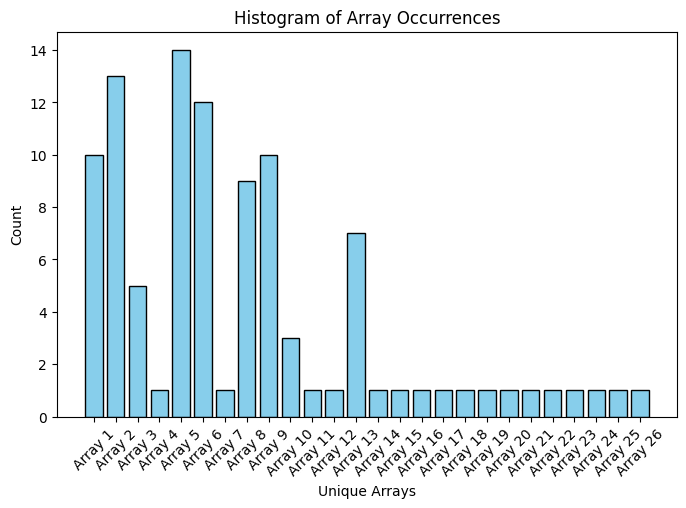

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def count_array_occurrences(array_list):
    array_tuples = [tuple(arr.tolist()) for arr in array_list]
    counts = Counter(array_tuples)
    return dict(counts)


# Count occurrences
scores = count_array_occurrences(POSs)

# Extract labels and values for histogram
labels = ['Array ' + str(i+1) for i in range(len(scores))]
values = list(scores.values())

# Plot histogram
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color='skyblue', edgecolor='black')
plt.xlabel('Unique Arrays')
plt.ylabel('Count')
plt.title('Histogram of Array Occurrences')
plt.xticks(rotation=45)
plt.show()


In [ ]:
weak_pos = GreedySearch(weak, k)
print(f"{k}-mers for 'synth_50_weak.fa':")
print(f'POS = {weak_pos}') 
for i in range(len(weak)):
    print(weak[i][weak_pos[i]:weak_pos[i]+k])

[37  7 24 24 32 25 32 21  1  6]
[ 3  7 24 24 32 25 32  4  1  6]
[ 3  7 24 24 32 25 32  4  1  6]
#iterations:3
10-mers for 'synth_50_weak.fa':
POS = [ 3  7 24 24 32 25 32  4  1  6]
AAAATCGCTT
AGATTATGCT
AGTATCACCC
AGGACTTCCA
CAAACGTCGT
AGATTCTGCC
CGGATCCCAC
AGTATTGCCT
AGGATTGACC
AGGTCCTCCA


## Gibbs Sampler

In [ ]:
#functions

def RandomPOS(DNA):
    N = len(DNA); l = len(DNA[0]) #number of seqs, length of each seq
    randpos = np.random.uniform(0, l-1, N)
    return randpos

# def totalcount(x, pseudocount):
#     x=list(x)
#     counts = np.array([
#         x.count('A'),
#         x.count('T'),
#         x.count('G'),
#         x.count('C')
#         ])
#     finalcount = (counts + pseudocount)/(len(x) + 4*pseudocount)
#     return finalcount


# def Profile(DNA, k, pos, log_odd=True):
#     N = len(DNA)# or pos0
#     x = np.empty((N, k), dtype=str) #matrix with k-mers
#     W = np.empty((4, k)) #position weight matrix
#     for i in range(N):
#         x[i, :] = list(DNA[i][pos[i]:pos[i]+k])
#     for j in range(k):
#         W[:,j] = totalcount(x[:,j], pseudocount=1)
#     if log_odd==True: # log-odds matrix
#         W2 = np.log(W*4)/np.log(4)
#     else: 
#         W2 = W
#     return W2

def Gibbs(DNA, k):
    randpos = RandomPOS(DNA)
    pwm = Profile(DNA, k, randpos)